Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from warnings import filterwarnings
filterwarnings(action='ignore')

Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\agnih\Desktop\ML\Unemployment_Rate_upto_11_2020.csv')
dataset.describe(include="all")

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
count,267,267,267,267.000000,2.670000e+02,267.000000,267,267.000000,267.000000
unique,27,10,1,NaN,NaN,NaN,5,NaN,NaN
top,Andhra Pradesh,31-03-2020,M,NaN,NaN,NaN,North,NaN,NaN
freq,10,27,267,NaN,NaN,NaN,79,NaN,NaN
mean,NaN,NaN,NaN,12.236929,1.396211e+07,41.681573,NaN,22.826048,80.532425
std,NaN,NaN,NaN,10.803283,1.336632e+07,7.845419,NaN,6.270731,5.831738
min,NaN,NaN,NaN,0.500000,1.175420e+05,16.770000,NaN,10.850500,71.192400
25%,NaN,NaN,NaN,4.845000,2.838930e+06,37.265000,NaN,18.112400,76.085600
50%,NaN,NaN,NaN,9.650000,9.732417e+06,40.390000,NaN,23.610200,79.019300
75%,NaN,NaN,NaN,16.755000,2.187869e+07,44.055000,NaN,27.278400,85.279900


In [3]:
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
dataset.isnull().sum() #Finding the null values

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
non_numeric_columns = dataset.select_dtypes(exclude=[np.number]).columns

# Create imputers for numeric and non-numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
non_numeric_imputer = SimpleImputer(strategy='most_frequent')

# Fill missing values in numeric columns
dataset[numeric_columns] = numeric_imputer.fit_transform(dataset[numeric_columns])

# Fill missing values in non-numeric columns
dataset[non_numeric_columns] = non_numeric_imputer.fit_transform(dataset[non_numeric_columns])

In [6]:
# Combine numeric and non-numeric columns
data_filled = dataset.copy()

In [7]:
print(data_filled)

             Region         Date  Frequency   Estimated Unemployment Rate (%)   
0    Andhra Pradesh   31-01-2020          M                              5.48  \
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   

In [8]:
data_filled.isnull().sum() #Checking for null values 

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [9]:
# Rename columns
data_filled = data_filled.rename(columns={
    data_filled.columns[0]: 'Region',
    data_filled.columns[3]: 'Unemployment_rate',
    data_filled.columns[4]: 'Employed',
    data_filled.columns[5]: 'Labour_participation_rate',
    data_filled.columns[6]: 'Area'
})

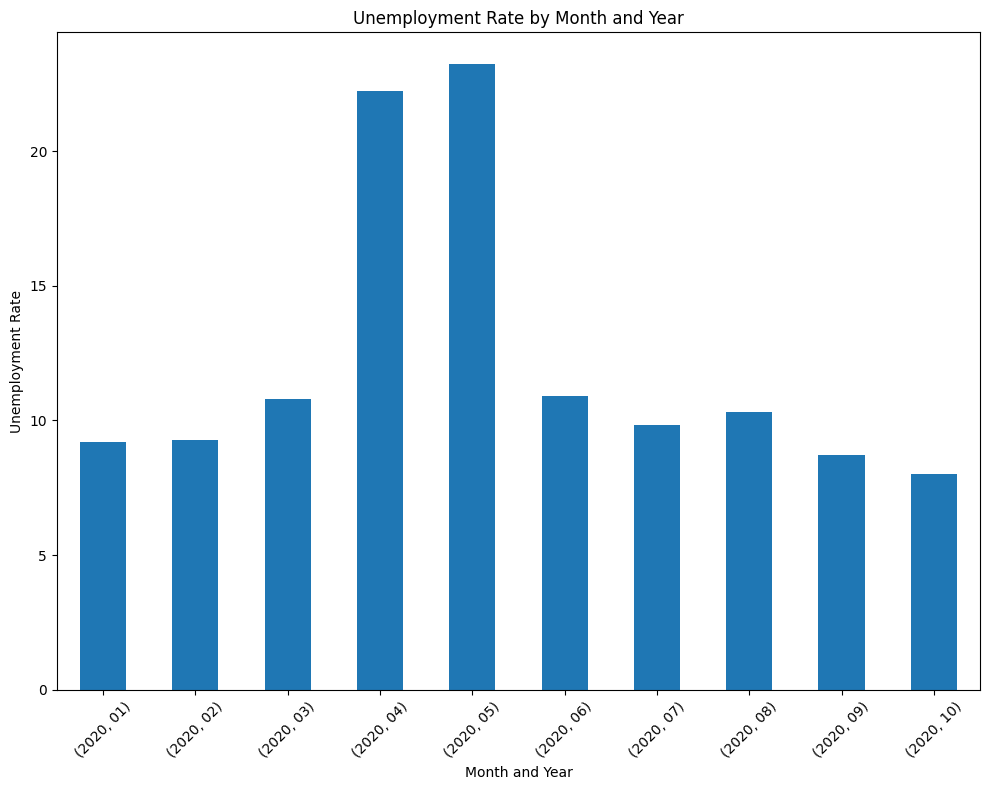

In [10]:
# Split the 'Date' column into day, month, and year
data_filled[["day", "month", "year"]] = data_filled[' Date'].str.split("-", expand=True)

# Group the data by month and year, and calculate the average unemployment rate
avg_unemployment_by_month_year = data_filled.groupby(["year", "month"])['Unemployment_rate'].mean()

# Create a bar plot for the unemployment rate by month and year
plt.figure(figsize=(10, 8))
avg_unemployment_by_month_year.plot(kind='bar')
plt.title('Unemployment Rate by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [11]:
data_filled.drop(columns=[' Frequency'],axis=1,inplace=True)

Text(0, 0.5, 'Unemployment Rate')

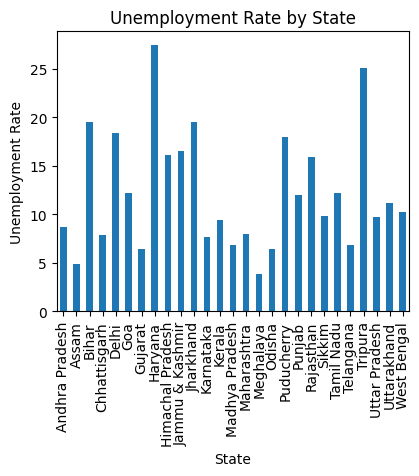

In [12]:
#Unemployment rate by state
plt.figure(figsize=(10, 8)) 
plt.subplot(2,2,4)
data_filled.groupby('Region')['Unemployment_rate'].mean().plot(kind='bar')
plt.title('Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Unemployment Rate')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chhattisgarh'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Goa'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu & Kashmir'),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Maharashtra'),
  Text(15, 0, 'Meghalaya'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana'),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh'),
  Text(25, 0, 'Uttarakhand'),
  Text(26, 0, 'West Bengal')])

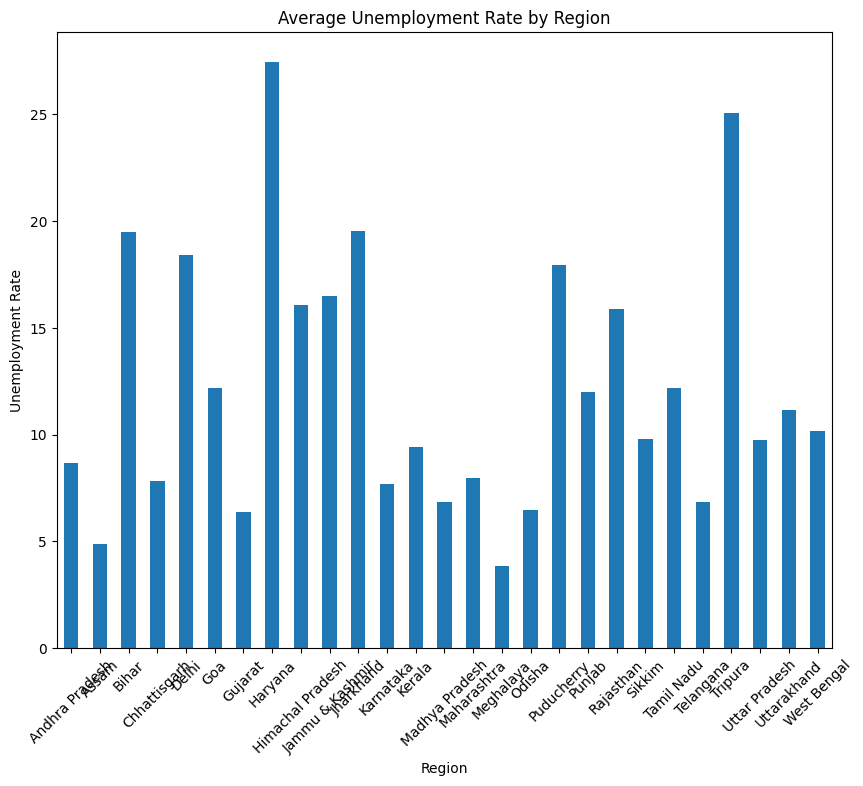

In [13]:
# Calculate the average unemployment rate by region
avg_unemployment_by_region = data_filled.groupby('Region')['Unemployment_rate'].mean()

# Create a bar plot for average unemployment rate by region
plt.figure(figsize=(10, 8))
avg_unemployment_by_region.plot(kind='bar')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

In [14]:
fg = px.scatter(data_filled,x='Region',y='Unemployment_rate',color='Region',
                title='Unemploymeny Rate (Statewise) by Scatter Plot',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

In [15]:
fg = px.histogram(data_filled,x='Region',y='Unemployment_rate',color='Region',
                  title='Unemploymeny Rate (Statewise) by Histogram',template='plotly')
fg.update_layout(xaxis={'categoryorder':'total descending'})
fg.show()

Text(0, 0.5, 'Employed Rate')

<Figure size 1000x800 with 0 Axes>

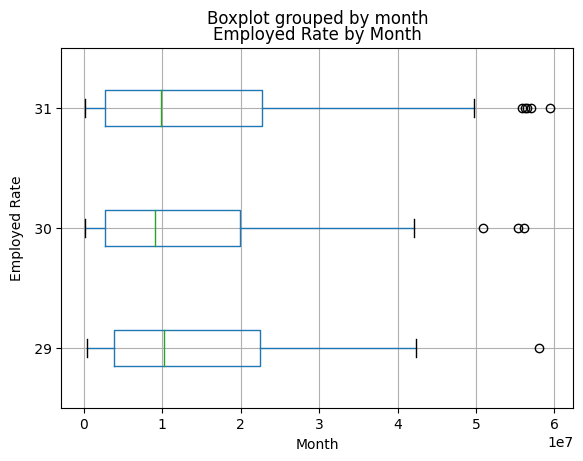

In [16]:
# Extract the month from the 'Date' column
data_filled['month'] = data_filled['day']

# Create a boxplot for the employed rate by month
plt.figure(figsize=(10, 8))
data_filled.boxplot(column='Employed', by='month', vert=False)
plt.title('Employed Rate by Month')
plt.xlabel('Month')
plt.ylabel('Employed Rate')

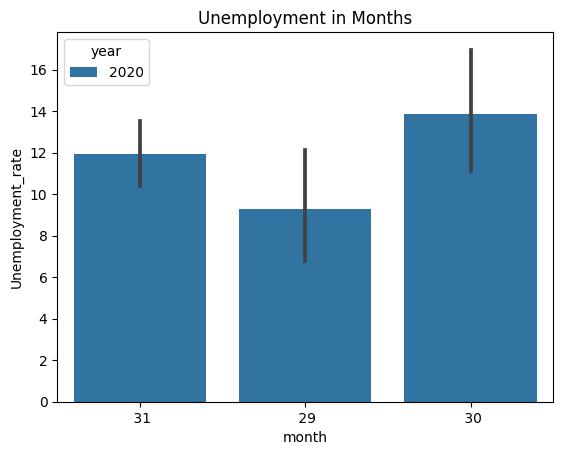

In [17]:
# Bar plot for unemployment rate by month and year
sns.barplot(x='month', y='Unemployment_rate', hue='year', data=data_filled)
plt.title("Unemployment in Months")
plt.show()

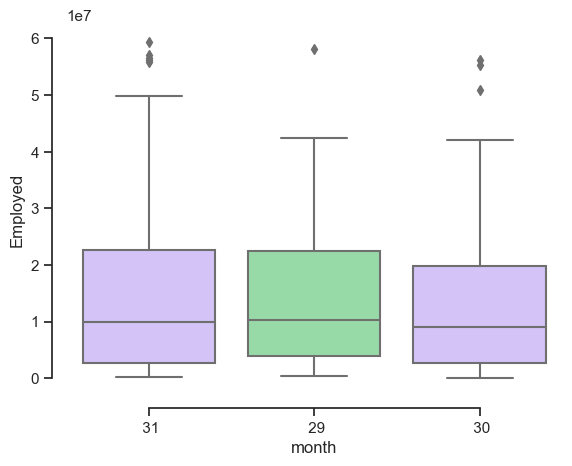

In [18]:
# Set Seaborn theme for boxplot
sns.set_theme(style='ticks', palette='pastel')

# Draw a nested boxplot to show employed rate by month
sns.boxplot(x='month', y='Employed', palette=['m', 'g'], data=data_filled)
sns.despine(offset=10, trim=True)

In [19]:
# Sunburst plot for unemployment rate by region
unemployment = data_filled[['Region', 'Unemployment_rate']]
figure = px.sunburst(unemployment, path=['Region'], values='Unemployment_rate',
                     width=700, height=700, color_continuous_scale='RdYlGn',
                     title='Unemployment Rate in India')
figure.show()   

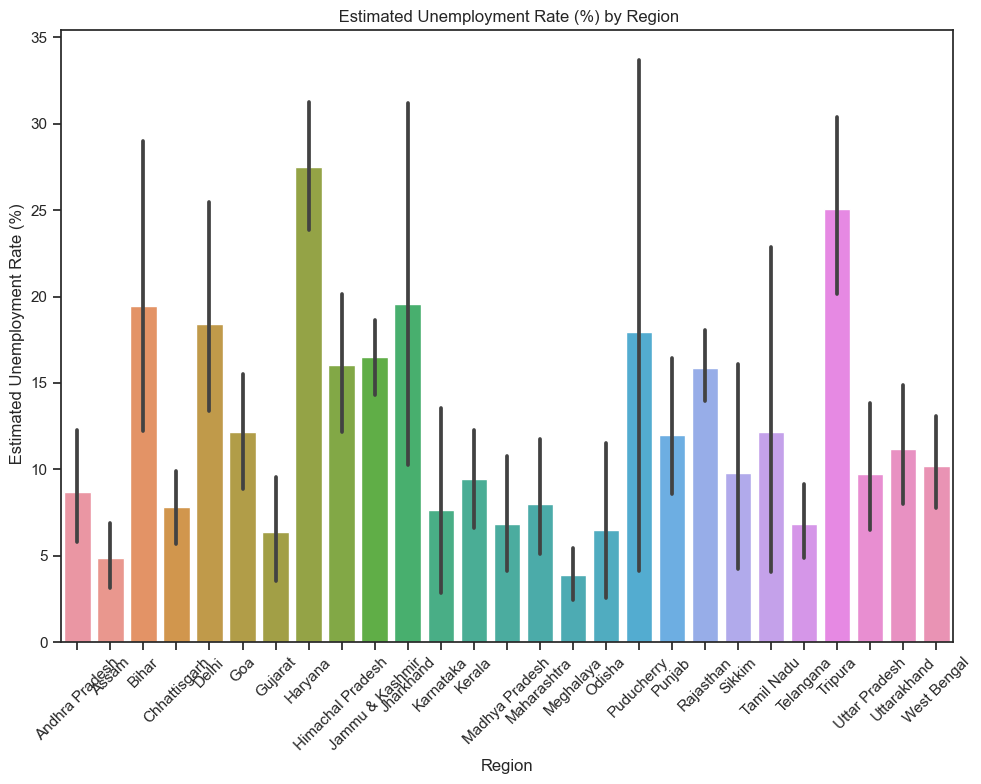

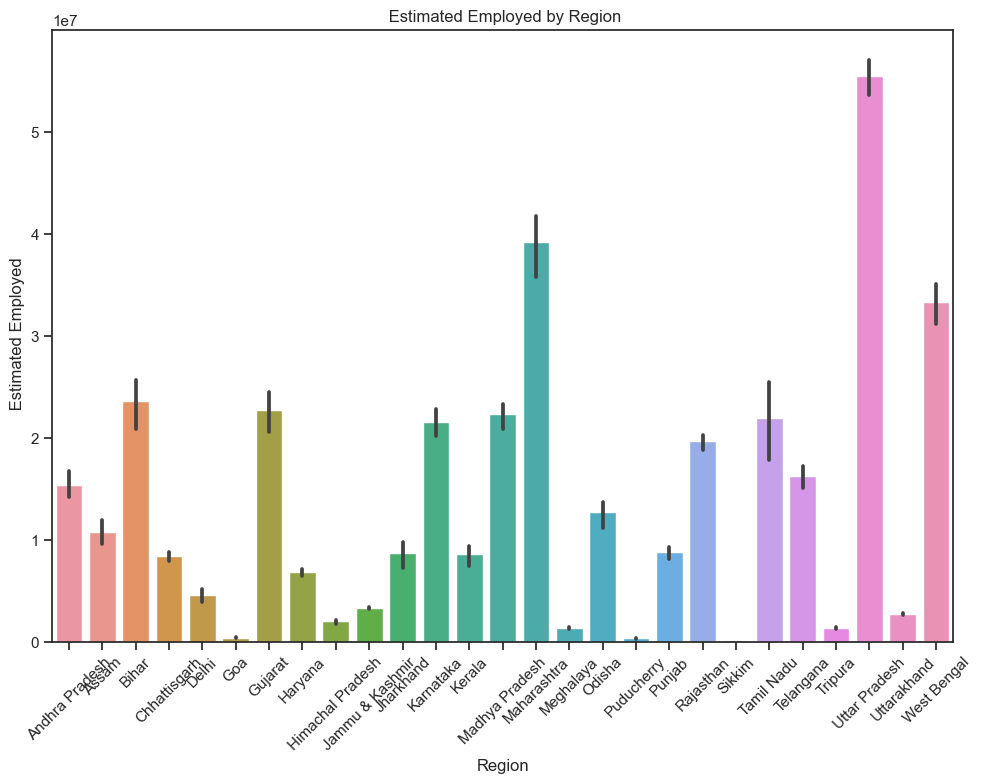

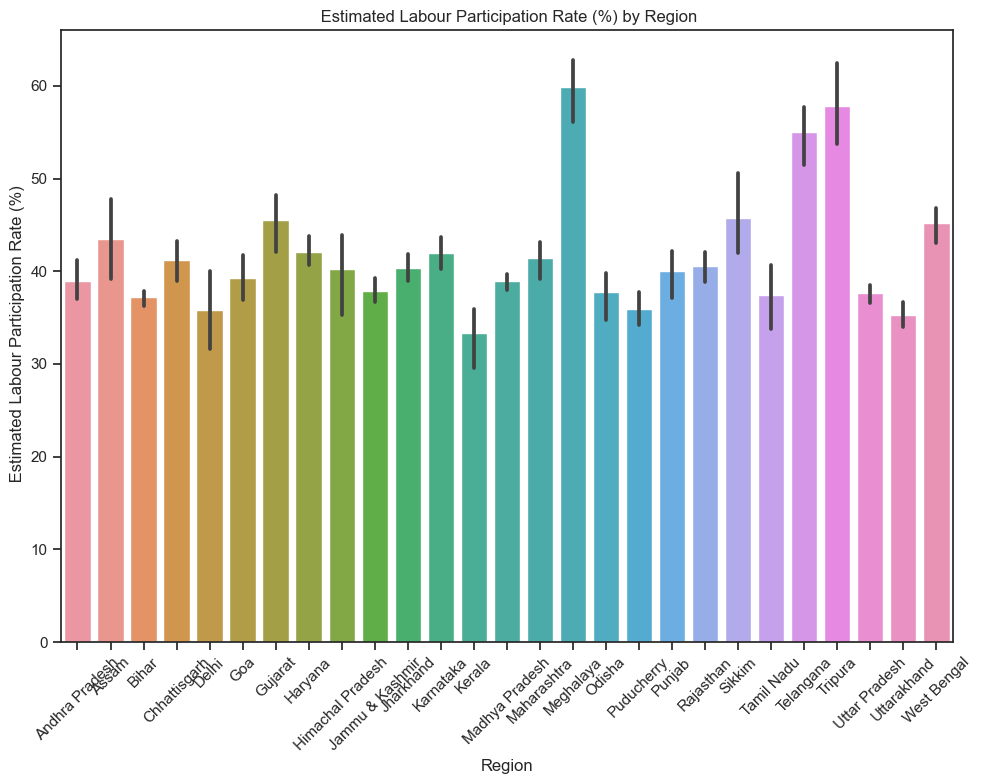

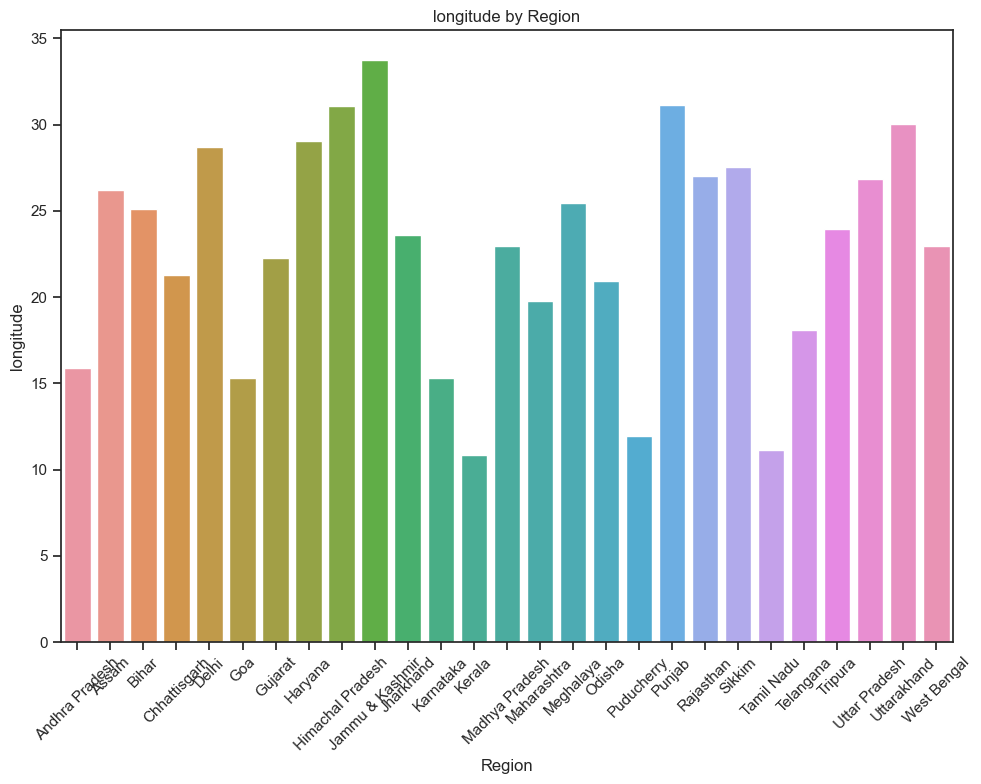

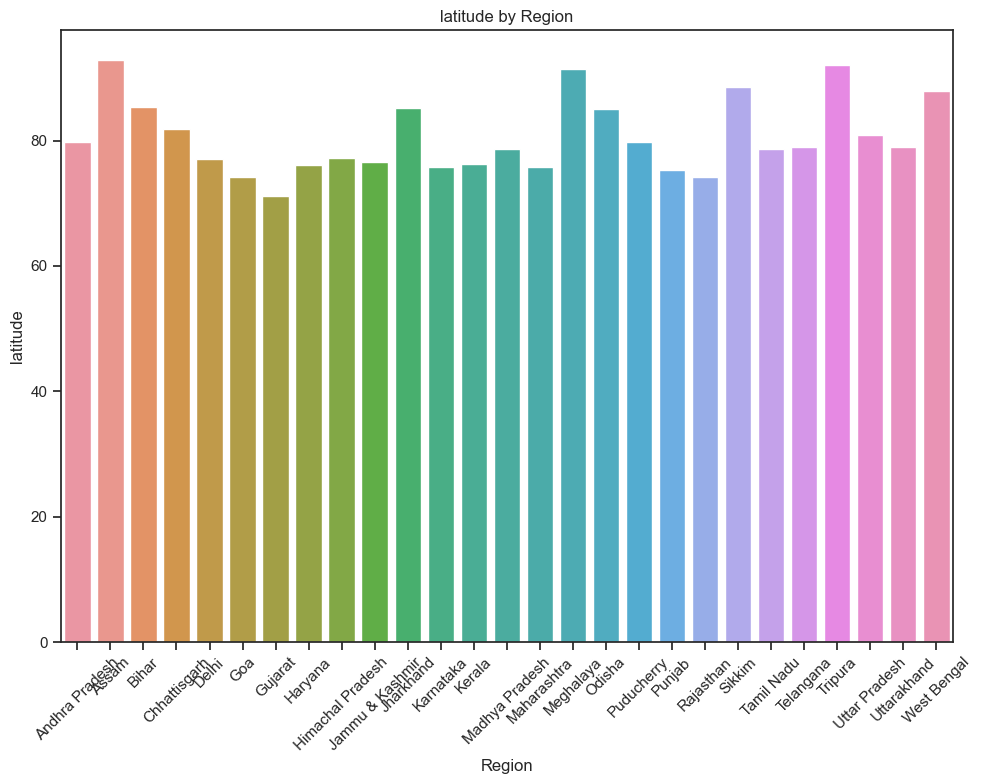

In [20]:
# Plot graphs for every numeric column with 'Region' individually
for column in dataset.columns[1:]:
    if np.issubdtype(dataset[column].dtype, np.number):
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Region', y=column, data=dataset)
        plt.title(f'{column} by Region')
        plt.xlabel('Region')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()